# Verify harmonisation and infill remaining gases

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os

import scmdata.database
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from ndcs.constants import RAW_DATA_DIR, PROCESSED_DATA_DIR, NDC_TARGET_RELEASE

<IPython.core.display.Javascript object>

/home/jared/miniconda3/envs/ndc-realisations-2021/lib/python3.9/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [4]:
INFILLING_SCENARIO = "ssp119"

<IPython.core.display.Javascript object>

# Load RCMIP

In [5]:
def rcmip_to_openscm_runner(inrun):
    def rename_variable(invar):
        if "F-Gases" in invar or "Montreal" in invar:
            bits = invar.split("|")
            out = "|".join([bits[0], bits[-1]])
        else:
            out = invar

        if invar == "Emissions|HFC4310":
            return "Emissions|HFC4310mee"

        return out.replace("NMVOC", "VOC").replace("SOx", "Sulfur")

    out = inrun.copy()
    out["variable"] = out["variable"].apply(rename_variable)

    return out

<IPython.core.display.Javascript object>

In [6]:
rcmip_emms = scmdata.ScmRun(
    os.path.join(RAW_DATA_DIR, "rcmip", "rcmip-emissions-annual-means-v5-1-0.csv"),
    lowercase_cols=True,
)

to_drop = [
    "Emissions|CO2",
    "Emissions|BC|*",
    "Emissions|CO2|MAGICC Fossil and Industrial|*",
    "Emissions|CH4|*",
    "Emissions|CO|*",
    "Emissions|N2O|*",
    "Emissions|NH3|*",
    "Emissions|NOx|*",
    "Emissions|OC|*",
    "Emissions|Sulfur|*",
    "Emissions|VOC|*",
]

rcmip_emms = rcmip_to_openscm_runner(
    rcmip_emms.filter(variable=to_drop, keep=False).filter(
        region="World", year=range(2000, 2101)
    )
)
rcmip_emms.get_unique_meta("variable")

['Emissions|BC',
 'Emissions|CH4',
 'Emissions|CO',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC23',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC4310mee',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|CF4',
 'Emissions|SF6',
 'Emissions|CCl4',
 'Emissions|CFC11',
 'Emissions|CFC113',
 'Emissions|CFC114',
 'Emissions|CFC115',
 'Emissions|CFC12',
 'Emissions|CH3Br',
 'Emissions|CH3CCl3',
 'Emissions|CH3Cl',
 'Emissions|HCFC141b',
 'Emissions|HCFC142b',
 'Emissions|HCFC22',
 'Emissions|Halon1202',
 'Emissions|Halon1211',
 'Emissions|Halon1301',
 'Emissions|Halon2402',
 'Emissions|N2O',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissions|OC',
 'Emissions|Sulfur',
 'Emissions|VOC',
 'Emissions|HFC152a',
 'Emissions|HFC236fa',
 'Emissions|HFC365mfc',
 'Emissions|NF3',
 'Emissions|C3F8',
 'Emissions|C4F10',
 'Emissions|C5F12',
 'Emissions|C7F1

<IPython.core.display.Javascript object>

## Load emissions

In [7]:
GLOBAL_DATABASE_DIR = os.path.join(
    PROCESSED_DATA_DIR, "global_emissions_pathways", NDC_TARGET_RELEASE
)

global_db = scmdata.database.ScmDatabase(
    GLOBAL_DATABASE_DIR,
    levels=(
        "ambition",
        "conditionality",
        "country_extension",
        "exclude_hot_air",
        "pathway_id",
        "global_extension",
    ),
)
global_db

<scmdata.database.SCMDatabase (root_dir: /home/jared/code/cr/ndc-realisations-2021/src/ndcs/../../data/processed/global_emissions_pathways/12Nov2021a_CR, levels: ('ambition', 'conditionality', 'country_extension', 'exclude_hot_air', 'pathway_id', 'global_extension'))>

<IPython.core.display.Javascript object>

In [8]:
scenarios = global_db.load(global_extension="eqw").filter(
    variable="Emissions|GHG*", keep=False
)

scenarios = rcmip_to_openscm_runner(scenarios)

Loading files:   0%|          | 0/1460 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [9]:
scenarios.get_unique_meta("variable")

['Emissions|BC',
 'Emissions|CH4',
 'Emissions|CO',
 'Emissions|CO2|MAGICC AFOLU',
 'Emissions|CO2|MAGICC Fossil and Industrial',
 'Emissions|NH3',
 'Emissions|NOx',
 'Emissions|OC',
 'Emissions|Sulfur',
 'Emissions|VOC',
 'Emissions|C2F6',
 'Emissions|C6F14',
 'Emissions|CF4',
 'Emissions|HFC125',
 'Emissions|HFC134a',
 'Emissions|HFC143a',
 'Emissions|HFC227ea',
 'Emissions|HFC23',
 'Emissions|HFC245fa',
 'Emissions|HFC32',
 'Emissions|HFC4310mee',
 'Emissions|N2O',
 'Emissions|SF6']

<IPython.core.display.Javascript object>

In [10]:
rcmip_scenario = rcmip_emms.filter(scenario=INFILLING_SCENARIO)
rcmip_variables = rcmip_scenario.get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [11]:
set(scenarios.get_unique_meta("variable")) - set(rcmip_variables)

set()

<IPython.core.display.Javascript object>

In [12]:
missing_variables = set(rcmip_variables) - set(scenarios.get_unique_meta("variable"))
missing_variables

{'Emissions|C3F8',
 'Emissions|C4F10',
 'Emissions|C5F12',
 'Emissions|C7F16',
 'Emissions|C8F18',
 'Emissions|CCl4',
 'Emissions|CFC11',
 'Emissions|CFC113',
 'Emissions|CFC114',
 'Emissions|CFC115',
 'Emissions|CFC12',
 'Emissions|CH2Cl2',
 'Emissions|CH3Br',
 'Emissions|CH3CCl3',
 'Emissions|CH3Cl',
 'Emissions|CHCl3',
 'Emissions|HCFC141b',
 'Emissions|HCFC142b',
 'Emissions|HCFC22',
 'Emissions|HFC152a',
 'Emissions|HFC236fa',
 'Emissions|HFC365mfc',
 'Emissions|Halon1202',
 'Emissions|Halon1211',
 'Emissions|Halon1301',
 'Emissions|Halon2402',
 'Emissions|NF3',
 'Emissions|SO2F2',
 'Emissions|cC4F8'}

<IPython.core.display.Javascript object>

Emissions|BC ['Mt BC / yr'] ['Mt BC/yr']
Emissions|CH4 ['Mt CH4 / yr'] ['Mt CH4/yr']
Emissions|CO ['Mt CO / yr'] ['Mt CO/yr']
Emissions|CO2|MAGICC AFOLU ['Mt CO2 / yr'] ['Mt CO2/yr']
Emissions|CO2|MAGICC Fossil and Industrial ['Mt CO2 / yr'] ['Mt CO2/yr']
Emissions|NH3 ['Mt NH3 / yr'] ['Mt NH3/yr']
Emissions|NOx ['Mt NOx / yr'] ['Mt NOx/yr']
Emissions|OC ['Mt OC / yr'] ['Mt OC/yr']
Emissions|Sulfur ['Mt SO2 / yr'] ['Mt SO2/yr']
Emissions|VOC ['Mt VOC / yr'] ['Mt VOC/yr']
Emissions|C2F6 ['kt C2F6 / yr'] ['kt C2F6/yr']
Emissions|C6F14 ['kt C6F14 / yr'] ['kt C6F14/yr']
Emissions|CF4 ['kt CF4 / yr'] ['kt CF4/yr']
Emissions|HFC125 ['kt HFC125 / yr'] ['kt HFC125/yr']
Emissions|HFC134a ['kt HFC134a / yr'] ['kt HFC134a/yr']
Emissions|HFC143a ['kt HFC143a / yr'] ['kt HFC143a/yr']
Emissions|HFC227ea ['kt HFC227ea / yr'] ['kt HFC227ea/yr']
Emissions|HFC23 ['kt HFC23 / yr'] ['kt HFC23/yr']
Emissions|HFC245fa ['kt HFC245fa / yr'] ['kt HFC245fa/yr']
Emissions|HFC32 ['kt HFC32 / yr'] ['kt HFC32/yr']


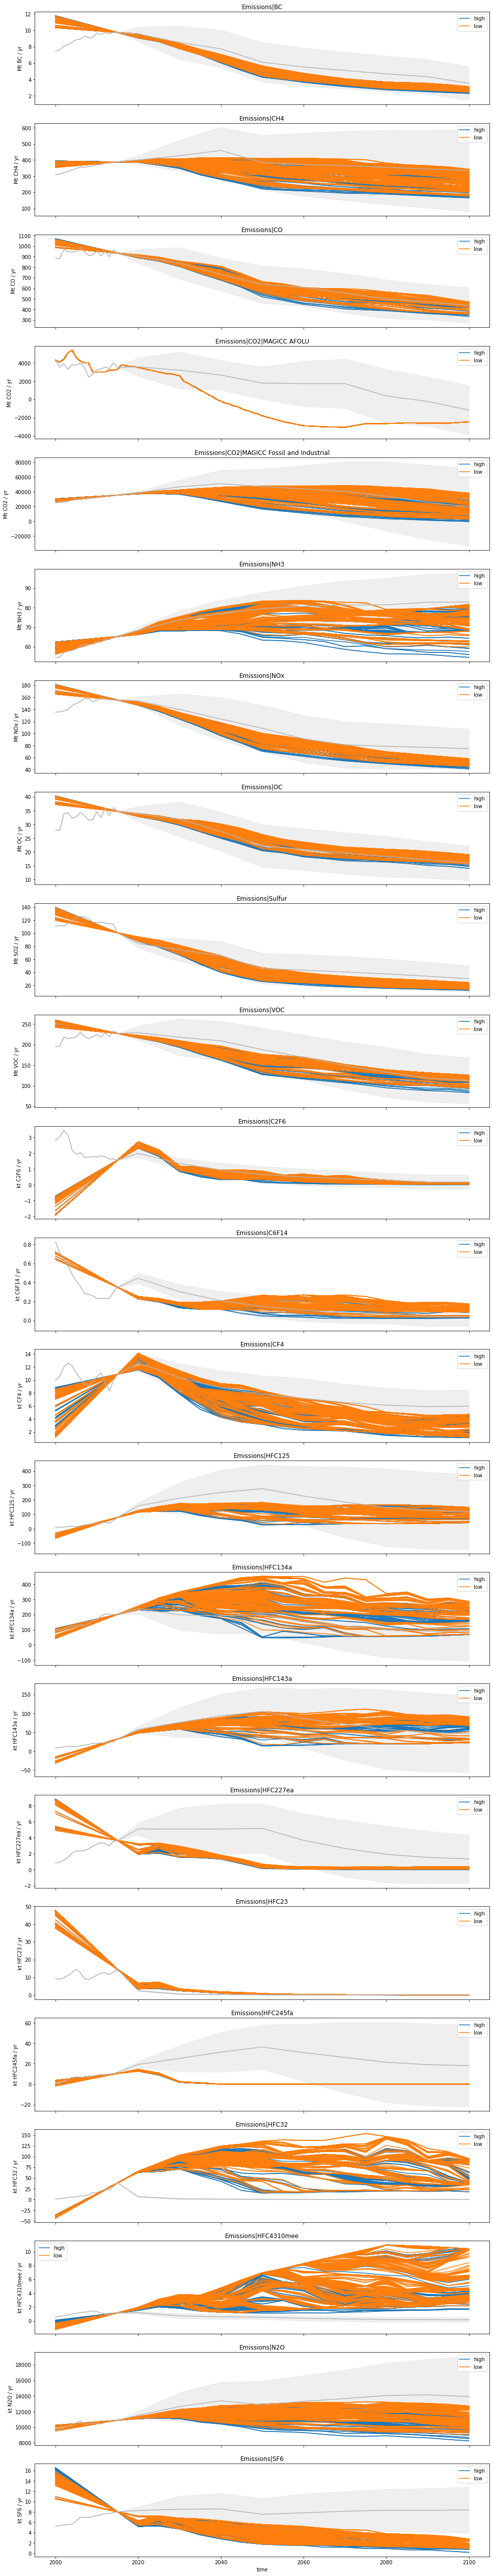

<IPython.core.display.Javascript object>

In [13]:
num_plots = len(scenarios.get_unique_meta("variable"))

fig = plt.figure(figsize=(16, 4 * num_plots))
axs = fig.subplots(num_plots, sharex=True)

for i, v in enumerate(scenarios.get_unique_meta("variable")):
    ax = axs[i]
    ax.set_title(v)

    scenarios_var = scenarios.filter(variable=v)
    rcmip_var = rcmip_emms.filter(variable=v, scenario="ssp*")

    if v == "Emissions|NOx":
        context = "NOx_conversions"
    else:
        context = "NH3_conversions"

    print(v, scenarios_var.get_unique_meta("unit"), rcmip_var.get_unique_meta("unit"))

    scenarios_var.line_plot(ax=ax, hue="ambition", units="scenario", estimator=None)
    rcmip_var.convert_unit(
        scenarios_var.get_unique_meta("unit", True), context=context
    ).line_plot(ax=ax, hue=None, color="0.7")

In [14]:
rcmip_missing_variables = rcmip_scenario.filter(variable=list(missing_variables))
rcmip_missing_variables = rcmip_missing_variables.drop_meta(["activity_id", "mip_era"])

<IPython.core.display.Javascript object>

In [15]:
rcmip_missing_variables

<ScmRun (timeseries: 29, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region scenario             unit             variable
	4953  IMAGE  World   ssp119    kt HFC152a/yr    Emissions|HFC152a
	4956  IMAGE  World   ssp119   kt HFC236fa/yr   Emissions|HFC236fa
	4959  IMAGE  World   ssp119  kt HFC365mfc/yr  Emissions|HFC365mfc
	4961  IMAGE  World   ssp119        kt NF3/yr        Emissions|NF3
	4963  IMAGE  World   ssp119       kt C3F8/yr       Emissions|C3F8
	4964  IMAGE  World   ssp119      kt C4F10/yr      Emissions|C4F10
	4965  IMAGE  World   ssp119      kt C5F12/yr      Emissions|C5F12
	4967  IMAGE  World   ssp119      kt C7F16/yr      Emissions|C7F16
	4968  IMAGE  World   ssp119      kt C8F18/yr      Emissions|C8F18
	4970  IMAGE  World   ssp119      kt cC4F8/yr      Emissions|cC4F8
	4972  IMAGE  World   ssp119      kt SO2F2/yr      Emissions|SO2F2
	4973  IMAGE  World   ssp119       kt CCl4/yr       Emissions|CCl4
	4974  IMAGE  World 

<IPython.core.display.Javascript object>

In [16]:
infilled = []
uniq_vars = [
    "pathway_id",
    "ambition",
    "conditionality",
    "country_extension",
    "exclude_hot_air",
    "scenario",
]

for s in tqdm(scenarios.groupby("scenario")):
    to_add = rcmip_missing_variables.copy()
    for v in uniq_vars:
        to_add[v] = s.get_unique_meta(v, True)

    infilled.append(s.append(to_add))

infilled = scmdata.run_append(infilled)
infilled["model"] = "NDC Factsheet"
infilled["model_version"] = NDC_TARGET_RELEASE
infilled

0it [00:00, ?it/s]

<ScmRun (timeseries: 75920, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      ambition conditionality country_extension exclude_hot_air global_extension          model  model_version    pathway_id region                                scenario     stage             unit                                    variable
	0         high              C            SSP1BL         exclude              eqw  NDC Factsheet  12Nov2021a_CR  2013-07-18_1  World  2013-07-18_1__high__C__SSP1BL__exclude  infilled       Mt BC / yr                                Emissions|BC
	1         high              C            SSP1BL         exclude              eqw  NDC Factsheet  12Nov2021a_CR  2013-07-18_1  World  2013-07-18_1__high__C__SSP1BL__exclude  infilled      Mt CH4 / yr                               Emissions|CH4
	2         high              C            SSP1BL         exclude              eqw  NDC Factsheet  12Nov2021a_CR  2013-07-18_1  World  2013-07-18_1__high__C_

<IPython.core.display.Javascript object>

In [17]:
for u in uniq_vars:
    print(infilled.get_unique_meta(u))

['2013-07-18_1', '2013-07-18_2', '2013-07-18_3', '2015-08-05_1', '2015-09-26_1', '2015-09-30_1', '2015-09-30_2', '2015-10-01_1', '2015-10-01_2', '2015-11-12_1', '2015-11-21_1', '2015-11-23_1', '2015-12-01_1', '2016-03-24_1', '2016-04-07_1', '2016-04-18_1', '2016-04-20_1', '2016-04-22_10', '2016-04-22_11', '2016-04-22_12', '2016-04-22_1', '2016-04-22_2', '2016-04-22_3', '2016-04-22_4', '2016-04-22_5', '2016-04-22_6', '2016-04-22_7', '2016-04-22_8', '2016-04-22_9', '2016-04-29_1', '2016-05-10_1', '2016-05-10_2', '2016-05-10_3', '2016-05-10_4', '2016-05-10_5', '2016-05-10_6', '2016-05-10_7', '2016-05-20_1', '2016-06-20_1', '2016-06-29_1', '2016-07-25_1', '2016-07-29_1', '2016-09-01_1', '2016-09-03_1', '2016-09-03_2', '2016-09-07_1', '2016-09-15_1', '2016-09-19_1', '2016-09-19_2', '2016-09-21_10', '2016-09-21_11', '2016-09-21_12', '2016-09-21_13', '2016-09-21_14', '2016-09-21_15', '2016-09-21_16', '2016-09-21_17', '2016-09-21_18', '2016-09-21_19', '2016-09-21_1', '2016-09-21_20', '2016-09-

<IPython.core.display.Javascript object>

In [18]:
# These scenarios are the complete scenarios to be run through MAGICC
infilled.to_csv(
    os.path.join(
        PROCESSED_DATA_DIR, "global_emissions", NDC_TARGET_RELEASE, "scenarios.csv"
    )
)

<IPython.core.display.Javascript object>